# Personal Info
<hr/>
    <div class="column" align=center>
    <font size=4>
        <div class="column">
        <br />
            student_number = Stu. No. 1
            <br />
            Name = Mobin
            <br />
            Last_Name = Khatib
        </div>
        <div class="column">
        <br />
            student_number = Stu. No. 2
            <br />
            Name = Amir Ali
            <br />
            Last_Name = Loghmani
        </div>
    </font>
    </div>


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


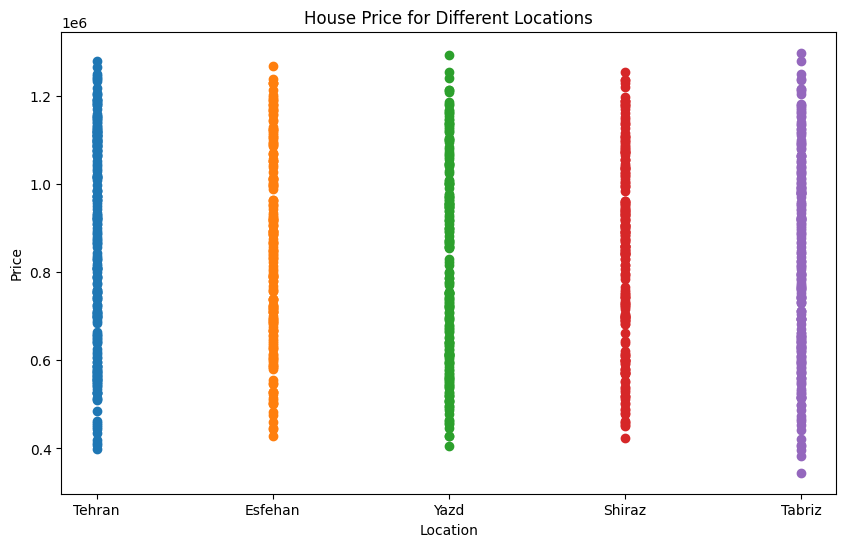

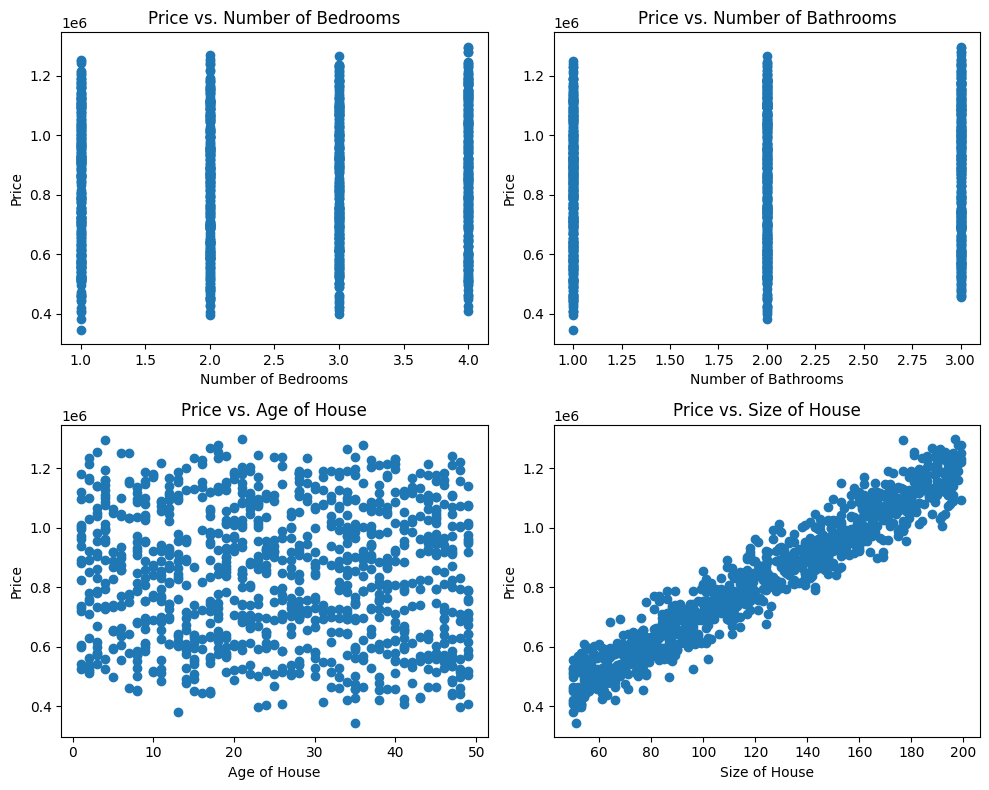

In [ ]:
#Simulation Question 5
import pandas as pd
import matplotlib.pyplot as plt

# Load the house_data.csv dataset
data = pd.read_csv('house_data.csv')

# Extract the necessary columns
price = data['price']
size = data['size']
bedrooms = data['bedrooms']
bathrooms = data['bathrooms']
locations = ['Tehran', 'Esfehan', 'Yazd', 'Shiraz', 'Tabriz']
location_columns = [data[loc] for loc in locations]
age = data['age']

# Create a new figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting price vs. location for each city
for location in locations:
    loc_col = data[location]
    loc_col_nonzero = loc_col[loc_col != 0]  # Exclude zero values
    price_nonzero = price[loc_col != 0]  # Corresponding prices without zero locations
    ax.scatter([location]*len(loc_col_nonzero), price_nonzero)

ax.set_xlabel('Location')
ax.set_ylabel('Price')
ax.set_title('House Price for Different Locations')
ax.set_xticks(locations)
ax.set_xticklabels(locations)

# Plotting price vs. number of bedrooms
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

axes[0, 0].scatter(bedrooms, price)
axes[0, 0].set_xlabel('Number of Bedrooms')
axes[0, 0].set_ylabel('Price')
axes[0, 0].set_title('Price vs. Number of Bedrooms')

# Plotting price vs. number of bathrooms
axes[0, 1].scatter(bathrooms, price)
axes[0, 1].set_xlabel('Number of Bathrooms')
axes[0, 1].set_ylabel('Price')
axes[0, 1].set_title('Price vs. Number of Bathrooms')

# Plotting price vs. age of house
axes[1, 0].scatter(age, price)
axes[1, 0].set_xlabel('Age of House')
axes[1, 0].set_ylabel('Price')
axes[1, 0].set_title('Price vs. Age of House')

# Plotting price vs. size of house
axes[1, 1].scatter(size, price)
axes[1, 1].set_xlabel('Size of House')
axes[1, 1].set_ylabel('Price')
axes[1, 1].set_title('Price vs. Size of House')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

Data for size is almost linear with price no matter what is the age of house or where the location is ,But the age of house as we see is somehow dependent than size of house and changes of price for number of bedrooms and bathrooms depend to the size of the house . Actually we can trust just to size of the house.

Based on your analysis of the scatter plots, it seems that the size of the house has a strong and consistent relationship with the price, regardless of the age of the house or its location. This finding suggests that the size of the house is a reliable predictor of its price.

On the other hand, the age of the house appears to have some impact on the price, although it may not be as strong as the relationship between size and price. This suggests that while the age of the house does influence the price, it is not the sole determining factor.

Furthermore, the number of bedrooms and bathrooms seems to have a relationship with the price, but it is influenced by the size of the house. This indicates that the size of the house plays a crucial role in determining the number of bedrooms and bathrooms, which in turn affects the price.

Based on these observations, it appears that the size of the house is the most important factor in determining its price. However, it's important to note that this conclusion is based on the provided scatter plots and may be subject to further analysis and investigation.

In [ ]:
#Simulation Question 6
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the dataset into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Initialize a StandardScaler object
scaler = StandardScaler()

# Fit and transform the training data
normalized_train_data = scaler.fit_transform(train_data)

# Transform the testing data
normalized_test_data = scaler.transform(test_data)

In [ ]:
#Simulation Question 7
def calculate_error(actual_prices, predicted_prices):
    if len(actual_prices) != len(predicted_prices):
        raise ValueError("The lengths of actual_prices and predicted_prices must be equal.")

    squared_errors = [(actual_price - predicted_price) ** 2 for actual_price, predicted_price in zip(actual_prices, predicted_prices)]
    mse = sum(squared_errors) / len(actual_prices)

    return mse

In [ ]:
#Simulation Question 8
def sgd_step(x, b, data_batch, learning_rate):
    if len(data_batch) == 0:
        raise ValueError("The data_batch array must not be empty.")

    np.random.shuffle(data_batch)  # Shuffle the data points within the batch

    for point in data_batch:
        xi, yi = point
        prediction = x * xi + b
        gradient_x = -2 * xi * (yi - prediction)
        gradient_b = -2 * (yi - prediction)

        x -= learning_rate * gradient_x
        b -= learning_rate * gradient_b

    return x, b

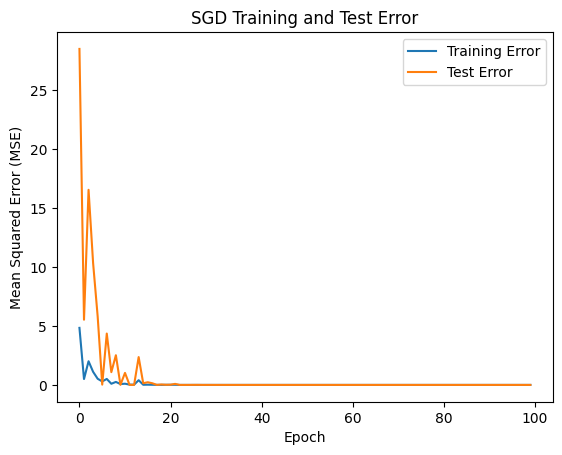

In [ ]:
#Simulation Question 9
import numpy as np
import matplotlib.pyplot as plt
def run_sgd(train_data, test_data, batch_size, learning_rate, epochs):
    num_train_batches = len(train_data) // batch_size
    num_test_batches = len(test_data) // batch_size
    train_errors = []
    test_errors = []

    # Initialize parameters
    x = 0.0
    b = 0.0

    for epoch in range(epochs):
        np.random.shuffle(train_data)  # Shuffle the training data

        for batch_idx in range(num_train_batches):
            # Extract current batch from training data
            start_idx = batch_idx * batch_size
            end_idx = start_idx + batch_size
            data_batch = train_data[start_idx:end_idx]

            # Execute one step of SGD
            x, b = sgd_step(x, b, data_batch, learning_rate)

        # Calculate training error
        train_predicted_prices = [x * xi + b for xi in train_data[:, 0]]
        train_actual_prices = train_data[:, 1]
        train_mse = calculate_error(train_actual_prices, train_predicted_prices)
        train_errors.append(train_mse)

        # Calculate test error
        test_predicted_prices = [x * xi + b for xi in test_data[:, 0]]
        test_actual_prices = test_data[:, 1]
        test_mse = calculate_error(test_actual_prices, test_predicted_prices)
        test_errors.append(test_mse)

    return train_errors, test_errors

# Example usage
train_data = np.array([[1, 2], [2, 4], [3, 6], [4, 8]])  # Example training data points
test_data = np.array([[5, 10], [6, 12], [7, 14]])  # Example test data points
batch_size = 2
learning_rate = 0.1
epochs = 100

train_errors, test_errors = run_sgd(train_data, test_data, batch_size, learning_rate, epochs)

# Plotting the error values
plt.plot(range(epochs), train_errors, label='Training Error')
plt.plot(range(epochs), test_errors, label='Test Error')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('SGD Training and Test Error')
plt.legend()
plt.show()
